# Investigating Fandango Movie Ratings

### Is Fandango still inflating ratings?

In October 2015, data journalist Walt Hickey analyzed movie ratings data and found evidence to suggest that Fandango's rating system was biased and dishonest. He found that there's a significant discrepancy between number of star displayed to users and the actual rating.  

He was able to find that:
- The actual rating almost always rounded up to nearest half-star. i.e. 4.1 -> 4.5
- For 8% of the ratings, rounded up to whole star. i.e. 4.5 -> 5

Fandango's offical response was that the biased rounding was cause by a bug in their system. In this project, we will determine whether there has been any change.

# Exploring the Data

We will work with two data sets. One from the previous data collected by Hickey in 2015 and another set sampled after.

In [1]:
import pandas as pd

previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [3]:
after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [4]:
# Isolate columns that are useful for our purposes
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

In [5]:
fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


# Changing the Goal of Our Analysis

Our original goal was to determine if there has been a change in Fandango's rating system after Hickey's analysis. The population of interest is made of all the movie ratings stored on Fandango's website, regardless of the releasing year.

The data we're working with has been sampled at the moments we want, but after some further research may not be a representative sample. The criteria used from Hickley is the following([data repository](https://github.com/fivethirtyeight/data/tree/master/fandango)):
- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling
- The movie must have had tickets on sale in 2015

The sampling is clearly not random. It seems most likely that the sample is not representative of the entire population we're originally interested in.

The sampling for the other sample were([data repository](https://github.com/mircealex/Movie_ratings_2016_17)):
- The movie must have been released in 2016 or later
- The movie must have had a considerable number of votes and reviews

Both samples are subject to temporal trends and it's unlikely to be representative of our population of interest.

Instead of collecting new data, we choose to change the goal of our analysis. Our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

# Isolating the Samples We Need

With our new research goal, the populations in interest are:
- All Fandango's ratings for popular movies released in 2015
- All Fandango's ratings for popular movies released in 2016

Here we will define "popular" the same way as Hickey; Having 30 or more fan ratings.


In [7]:
sum(fandango_previous['Fandango_votes'] < 30)

0

Exploring the data sets, there are movies with releasing years different than 2015 or 2016. We will isolate the movies released in 2015 or 2016.

In [8]:
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [9]:
# Make a year column extracted from the Film title
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [10]:
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [11]:
# Drop 2014 movies
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [12]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [13]:
# Drop 2017 movies
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

# Comparing Distributions Shapes for 2015 and 2016

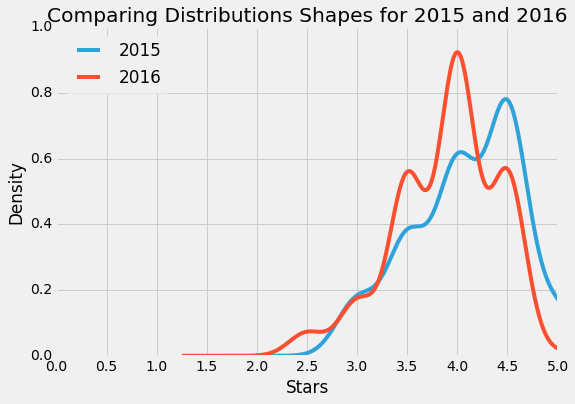

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend =True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label='2016', legend =True)

plt.title('Comparing Distributions Shapes for 2015 and 2016')
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,0.5))
plt.show()

Two aspects of the figure are apparant:
- Both distributions are strongly left skewed
- The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.

The slight left shift of the 2016 distribution is interesting for our analysis. The ratings in 2016 were slightly lower compared to 2015.

# Comparing Relative Frequencies

In [15]:
print('2015' + '\n' + '_'*16)
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
________________


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [16]:
print('2016' + '\n' + '_'*16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
________________


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a 5 star rating compared to alomost 7% in 2015. Ratings of 4.5 were also more popular in 2015.

The minimum rating is also lower in 2016 than in 2015.

# Determining the Direction of the Change

In [27]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015,median_2015,mode_2015]
summary['2016'] = [mean_2016,median_2016,mode_2016]
summary.index = ['mean','median','mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


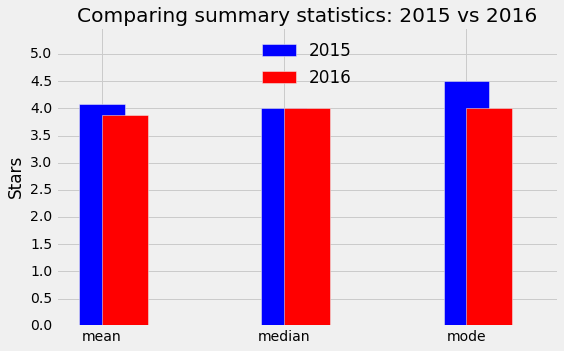

In [31]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color= 'blue', align= 'center', label= '2015', width=0.25)
summary['2016'].plot.bar(color= 'red', align= 'edge', label= '2016', width=0.25, rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,0.5))
plt.ylabel('Stars')
plt.legend(framealpha= 0, loc= 'upper center')
plt.show()

The mean rating in 2016 was lower by approximately 0.2. The median is the same for both distributions, but the mode is approximately 0.5 lower in 2016.

# Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and 2016. We determined that on average popular movies from 2016 were rated lower on Fandango than movies from 2015.

This could be due to Fandango fixing the biased rating system after Hickey's analysis, but cannot be completely sure.